In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.metrics import mean_squared_error
import pickle
from statsmodels.tsa.statespace.varmax import VARMAX
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel("/usr/input/flipr-hackathon-dataset/Train_dataset.xlsx",1)

In [3]:
data.head()

,people_ID,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00
0,1,441,544.2,669.64,821.368,1002.2416,1215.68992,1472.627904
1,2,151,197.2,253.24,321.688,399.9256,492.91072,606.892864
2,3,416,515.2,632.44,776.728,947.7736,1150.32832,1395.793984
3,4,410,506.0,621.40,761.880,928.1560,1126.78720,1368.344640
4,5,390,483.0,595.00,730.200,892.8400,1084.40800,1315.889600


Check to see if there are any missing values:

In [4]:
data.isnull().sum()

people_ID              0
2020-03-20 00:00:00    0
2020-03-21 00:00:00    0
2020-03-22 00:00:00    0
2020-03-23 00:00:00    0
2020-03-24 00:00:00    0
2020-03-25 00:00:00    0
2020-03-26 00:00:00    0
dtype: int64

Let us observe a few plots of data:

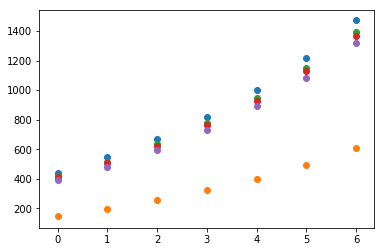

In [5]:
for i in range(5):
    plt.scatter(range(7),data.iloc[i,1:].values)

Looking above, we can see that most of the time series data is of "quadractic nature" which can be handled by linear regression.<br>
Let us see a few more plots to make it clear:

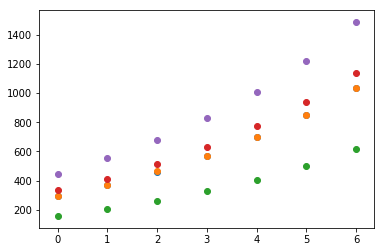

In [6]:
for i in range(5000,5005):
    plt.scatter(range(7),data.iloc[i,1:].values)

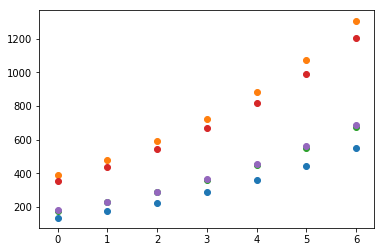

In [7]:
for i in range(len(data)-5,len(data)):
    plt.scatter(range(7),data.iloc[i,1:].values)

Looks like our hypothesis is correct!<br>
Now, let us try actual regression and some plots to make this concrete:

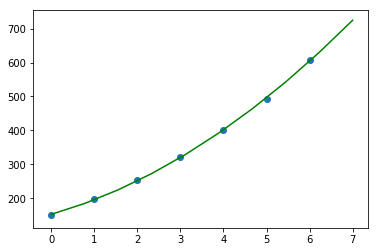

In [8]:
model = LinearRegression()
X = np.array(list(range(7))).reshape(-1,1)
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X)
y_train = data.iloc[1,1:].values
model.fit(X_train, y_train.reshape(-1,1))
plt.plot(np.linspace(0,7,10), model.predict(poly.transform(np.linspace(0,7,10).reshape(-1,1))),c='g')
plt.scatter(np.array(list(range(7))), data.iloc[1,1:].values)

As we can see above, our predicted curve fits the given points beautifully!, <br>
Let us try for two other rows of data:

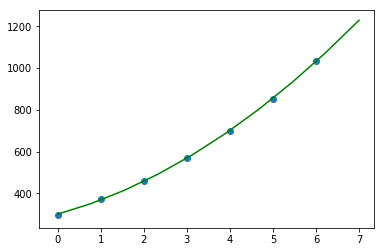

In [9]:
model = LinearRegression()
X = np.array(list(range(7))).reshape(-1,1)
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X)
y_train = data.iloc[5000,1:].values
model.fit(X_train, y_train.reshape(-1,1))
plt.plot(np.linspace(0,7,10), model.predict(poly.transform(np.linspace(0,7,10).reshape(-1,1))),c='g')
plt.scatter(np.array(list(range(7))), data.iloc[5000,1:].values)

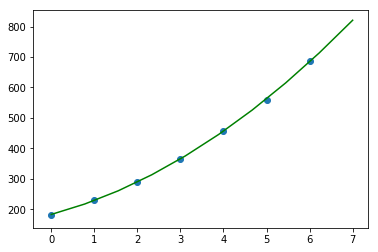

In [10]:
model = LinearRegression()
X = np.array(list(range(7))).reshape(-1,1)
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X)
y_train = data.iloc[len(data)-1,1:].values
model.fit(X_train, y_train.reshape(-1,1))
plt.plot(np.linspace(0,7,10), model.predict(poly.transform(np.linspace(0,7,10).reshape(-1,1))),c='g')
plt.scatter(np.array(list(range(7))), data.iloc[len(data)-1,1:].values)

Our proposed models fit the points beautifully, now let us find the diuresis parameter for all the patients:

In [11]:
X = np.array(list(range(7))).reshape(-1,1)
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X)
X_test = np.array([8]).reshape(-1,1)
X_test = poly.transform(X_test)
new_diuresis = []
for i in range(len(data)):
    model = LinearRegression()
    y_train = data.iloc[i,1:].values
    model.fit(X_train, y_train.reshape(-1,1))
    # since it is not feasible to plot for all the data points, we will print out the error
    new_diuresis.append(model.predict(X_test)[0][0])
    if i % 100 == 0:
        print(i,"R2= ", model.score(X_train, y_train))

0 R2=  0.9998433055113015
100 R2=  0.999879730900633
200 R2=  0.9997774883813905
300 R2=  0.9997880512326495
400 R2=  0.9997660088387273
500 R2=  0.9997866458899157
600 R2=  0.9997918401452185
700 R2=  0.9997739082429195
800 R2=  0.999836072804207
900 R2=  0.9998424162408921
1000 R2=  0.9997962130312044
1100 R2=  0.9998013520860359
1200 R2=  0.9998546235174963
1300 R2=  0.9998354102780479
1400 R2=  0.999751779025601
1500 R2=  0.999771146762897
1600 R2=  0.9997968978073624
1700 R2=  0.999875622049731
1800 R2=  0.9998214156970607
1900 R2=  0.9997980683373628
2000 R2=  0.9997488038614503
2100 R2=  0.9997827765476387
2200 R2=  0.9997717291483977
2300 R2=  0.9998023393688871
2400 R2=  0.9997117099189521
2500 R2=  0.9997764875000229
2600 R2=  0.9997870741873556
2700 R2=  0.9998271637933736
2800 R2=  0.9997925337133324
2900 R2=  0.9997828439485884
3000 R2=  0.9998088820631857
3100 R2=  0.9998569807734484
3200 R2=  0.9997811453013902
3300 R2=  0.999816297289869
3400 R2=  0.9997880149128548
350

Judging from the R2 values above, we can see that our models are a very good fit for each of the patients.

Now, load the problem 1 data:

In [12]:
cat_features = [0,1,3,4,7,10,11,]

In [13]:
# preprocessing for model 1
data = pd.read_excel("/kaggle/input/flipr-hackathon-dataset/Train_dataset.xlsx",0)
data = data.drop(["Name", "Designation", "Region", "people_ID"],axis = 1)
data = data.drop(["Infect_Prob"], axis = 1)
# impute all missing categorical variables with most common value
data.iloc[:,cat_features] = data.iloc[:,cat_features].apply(lambda x: x.fillna(x.value_counts().index[0]))

In [14]:
# update the values of Diuresis
data["Diuresis"] = pd.Series(new_diuresis)

In [15]:
# load the cat boost model
model1 = pickle.load(open("/kaggle/input/ensemble-model/cat_boost_model","rb"))

In [16]:
pred1 = model1.predict(data.values)

In [17]:
# load the lightgbm model
model2 = pickle.load(open("/kaggle/input/ensemble-model/lightgbm_boost_model","rb"))

In [18]:
# preprocessing
for i in cat_features:
    le = LabelEncoder()
    data.iloc[:,i] = le.fit_transform(data.iloc[:,i])

In [19]:
pred2 = model2.predict(data.values)

In [20]:
# combine the two models
pred_vals = pd.DataFrame((pred1+pred2)/2, index = data.index)

In [21]:
# save to csv file
pred_vals.to_csv("/kaggle/working/problem2.csv")

In [22]:
new_diuresis[-1]

972.3674148571431

In [23]:
data["Diuresis"] = pd.Series(new_diuresis)

In [24]:
data["Diuresis"]

0        2049.591232
1         857.959483
2        1944.351301
3        1906.279977
4        1834.745371
            ...     
10709     781.664265
10710    1814.218487
10711     954.474921
10712    1679.106098
10713     972.367415
Name: Diuresis, Length: 10714, dtype: float64

In [25]:
newdata = pd.read_excel("/kaggle/input/flipr-hackathon-dataset/Train_dataset.xlsx",1)
datadata = pd.read_excel("/kaggle/input/flipr-hackathon-dataset/Train_dataset.xlsx",0)

In [26]:
(data.index == newdata.index).sum()

10714

In [27]:
len(data)

10714